In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from sklearn.datasets import make_classification

In [54]:
X,y=make_classification(n_samples=1000,
    n_features=2,n_classes=2,
    n_clusters_per_class=2,n_redundant=0)

<Axes: xlabel='0', ylabel='1'>

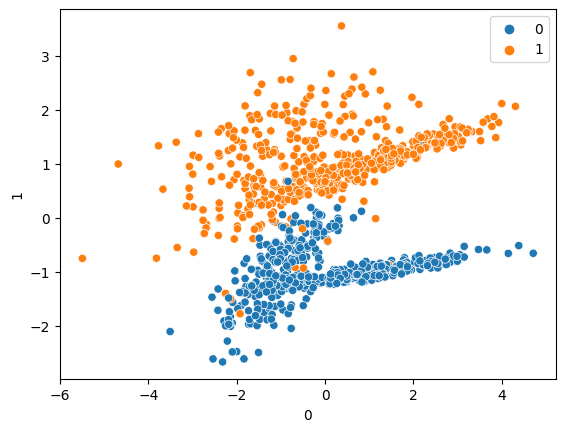

In [55]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [57]:
from sklearn.svm import SVC

In [34]:
svc=SVC(kernel='linear')

In [58]:
svc.fit(X_train,y_train)

SVC(kernel='linear')

In [59]:
svc.coef_

array([[-0.7164443 ,  2.47779597]])

In [60]:
y_pred=svc.predict(X_test)

In [61]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [62]:
print("confusion matrix")
print(confusion_matrix(y_test,y_pred))
print("accuracy score")
print(accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

confusion matrix
[[157   2]
 [  3 168]]
accuracy score
0.9848484848484849

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.99      0.98      0.99       171

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330



In [63]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear']
              }

In [78]:
cv=GridSearchCV(svc,param_grid=param_grid,cv=5,verbose=3,refit=True)

In [79]:
cv.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

[CV 2/5] END ....C=1000, gamma=1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=1, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.955 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.1, kernel=linear;, score=0.970 total time=   0.0s
[CV 1/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.955 total time=   0.0s
[CV 2/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.985 total time=   0.0s
[CV 3/5] END .C=1000, gamma=0.01, kernel=linear;, score=0.978 total time=   0.0s
[CV 4/5] END .C=1000, gamma=

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [80]:
cv.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [81]:
## Prediction
y_pred4=cv.predict(X_test)
print(classification_report(y_test,y_pred4))
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       159
           1       0.99      0.98      0.99       171

    accuracy                           0.98       330
   macro avg       0.98      0.98      0.98       330
weighted avg       0.98      0.98      0.98       330

[[157   2]
 [  3 168]]
0.9848484848484849
